# Data exploration for MSc5_research_project 

This jupyter notebook deals with exploring the data for my research project within the MSc05 course in the Neurocognitive Psychology lab at Goethe University Frankfurt within the psychology master degree program. 

The main idea of the project is to use machine learning in order to predict whether a person can be classified either as a healthy control or a patient with psychotic disorder based on different MRI metrics and to see which of them provides more accuracy. 





## 1. Data access

The data I am going to use for the project is available on [figshare](https://figshare.com/articles/dataset/Data_for_Functional_MRI_connectivity_accurately_distinguishes_cases_with_psychotic_disorders_from_healthy_controls_based_on_cortical_features_associated_with_brain_network_development_/12361550) and originates from the paper "Functional MRI connectivity accurately distinguishes cases with psychotic disorders from healthy controls, based on cortical features associated with brain network development" by [Young et al. (2020)](https://doi.org/10.1101/19009894). The github repository for the study can be accessed [here](https://github.com/jmyoung36/fMRI_connectivity_accurately_distinguishes_cases).




## 2. What does the data contain? General overview

The already pre-processed data contains different metrics for three different locations being Dublin, Maastricht and Cobre. 

For the **macro-structural** data ***cortical thickness (CT)*** was estimated for 308 cortical regions according to a derived version of the Desikian-Killiany atlas [(Desikan et al, 2006)](https://www.sciencedirect.com/science/article/abs/pii/S1053811906000437?via%3Dihub). The files for the derived and adjusted atlas can be found in this [github repository](https://github.com/RafaelRomeroGarcia/subParcellation), the respective paper [here](https://doi.org/10.1016/j.neuroimage.2011.10.086).

The **micro-structural** data contains diffusion weighted images (DWI) from which regional cortical measures such as ***mean diffusivity (MD)*** and ***fractional anisotropy (FA)*** were estimated.

There are further metrics such as ***functional magnet resonance imaging data (fMRI), fMRI connectivity and network data*** and ***structural connectivity*** and ***DWI tractography***. For project purposes, only the **macro and micro-structural** data will be used. On top of that, the data for only Dublin is going to be explored since it provides the best image quality (see Table 1 in [Young et al., 2020)](https://doi.org/10.1101/19009894) and not every modality was measured for the Cobre dataset. 

Demographic data such as Age and Gender is also provided.

## 3. Demographic data

First of all, I am going to explore the demographic data to get a better understanding of the sample. In the Dublin dataset, there is a different subset of patients with **DWI** data compared to those with **CT** data. Both "subsets" are loaded and compared with regard to basic demographic variables.

In [2]:
#import module to read the CT and DWI data

import pandas as pd

#store CT data in variable "CT_Dublin"

CT_Dublin = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_thickness_Dublin.csv', delimiter = ',')

In [3]:
#get columns of pandas dataframe

CT_Dublin.columns

Index(['Subject ID', 'Age', 'Sex', 'Group', 'lh_bankssts_part1_thickness',
       'lh_bankssts_part2_thickness',
       'lh_caudalanteriorcingulate_part1_thickness',
       'lh_caudalmiddlefrontal_part1_thickness',
       'lh_caudalmiddlefrontal_part2_thickness',
       'lh_caudalmiddlefrontal_part3_thickness',
       ...
       'rh_supramarginal_part5_thickness', 'rh_supramarginal_part6_thickness',
       'rh_supramarginal_part7_thickness', 'rh_frontalpole_part1_thickness',
       'rh_temporalpole_part1_thickness',
       'rh_transversetemporal_part1_thickness', 'rh_insula_part1_thickness',
       'rh_insula_part2_thickness', 'rh_insula_part3_thickness',
       'rh_insula_part4_thickness'],
      dtype='object', length=312)

As we can see, besides the different brain regions there are columns that indicate the demographic data that we are interested in for now. 

In [4]:
#select a subset of the CT data

demographic_CT = CT_Dublin[["Subject ID", "Age", "Sex", "Group"]]

In [5]:
#view demographic data of CT data

demographic_CT

,Subject ID,Age,Sex,Group
0,CON9225,21,2,1
1,CON9229,28,2,1
2,CON9231,29,2,1
3,GASP3037,61,1,2
4,GASP3040,47,1,2
...,...,...,...,...
103,RPG9019,31,1,2
104,RPG9102,42,2,2
105,RPG9119,41,1,2
106,RPG9121,51,1,2


As it can be seen, for the **CT** data there is a total of N=108 participants. 

Having the subset of demographic information for the **CT** data, there is an excel file for the demographic information for the **DWI** data. 

In [6]:
#read an Excel file as pandas data frame

demographic_DWI = pd.read_excel(r'/Users/mello/data/MSc5_research_project/data/DTI_demographics_Dublin.xls')
demographic_DWI

,Subject ID,Age,Sex,Group
0,con11,34,1,1
1,con12,26,2,1
2,con18,27,2,1
3,con19,36,1,1
4,con20,23,1,1
...,...,...,...,...
118,pat92,26,1,2
119,pat94,27,1,2
120,pat96,23,2,2
121,pat98,32,2,2


For the **DWI** data there is a total of N=123 participants.

<font color='red'>**NOTE:**</font> **In my case, the excel file format had to be in "xls" for it to be converted into a pandas data frame. The formats "xlsm" and "xlsx" did not work for me. In case you get an import error saying "Missing optional dependency "xlrd"", run the following code below in bash. For further help, click [here](https://datatofish.com/read_excel/).**

In [7]:
#use ! to run command in bash
!pip install xlrd

Now, having demographic data subsets of both **CT** and **DWI** data, they can be explored. The documentation on [figshare](https://figshare.com/articles/dataset/Data_for_Functional_MRI_connectivity_accurately_distinguishes_cases_with_psychotic_disorders_from_healthy_controls_based_on_cortical_features_associated_with_brain_network_development_/12361550) provides label information for Sex (1=male, 2=female) and Group (1=control, 2=case).

In [8]:
#n of control and patients
print(demographic_CT['Group'].value_counts()) 

1    80
2    28
Name: Group, dtype: int64


In [9]:
#n of males and females
print(demographic_CT['Sex'].value_counts()) 

1    60
2    48
Name: Sex, dtype: int64


In [10]:
#get age information
demographic_CT['Age'].describe()

count    108.000000
mean      31.231481
std       10.911373
min       18.000000
25%       22.000000
50%       29.000000
75%       38.250000
max       64.000000
Name: Age, dtype: float64

To sum up the demographic data, for the **CT** data within the Dublin sample there is n=80 controls and n=28 patients, a total of N=108 participants of which n=60 are males and n=48 females. The mean age is M=31.23 years with a standard deviation of SD=10.91 years. The age ranges from min=18 years to max=64 years.

In [11]:
#n of control and patients
print(demographic_DWI['Group'].value_counts()) 

2    64
1    59
Name: Group, dtype: int64


In [12]:
#n of males and females
print(demographic_DWI['Sex'].value_counts()) 

1    66
2    57
Name: Sex, dtype: int64


In [13]:
#get age information
demographic_DWI['Age'].describe()

count    123.000000
mean      28.455285
std        8.518304
min       17.000000
25%       22.000000
50%       27.000000
75%       32.000000
max       50.000000
Name: Age, dtype: float64

The **DWI data** subset for the Dublin sample consists of a total of N=123 particpants with n=56 being control and n=64 patients. There are n=66 males and n=57 females. The mean age is M=28.46 years with a standard deviation of SD=8.52 years. The age ranges from min=17 years to max=50 years.

### 3. Exploring the different modalities

In the following chapter, the different modalities are explored. Before getting a deeper look at the data, the derived form of the Desikan-Killiany Atlas with 308 cortical regions that is used for the **macro- and micro-structural data** is visualized.
As already mentioned above, there is a [github repository](https://github.com/RafaelRomeroGarcia/subParcellation) for that specific atlas with the required files therein. Since there is a poor documentation of the files and their content, it might be confusing which of them is actually required for visualization purposes. 


If you click on the repository link, the first folder with the title "500mm parcellation (308 regions)" is the relevant one. In the folder itself, there are two text files (.txt) with the coordinates and names of the 308 regions and two NIFTI files (.nii.gz). These are the files, that I used for visualization. For that, I used the nibabel and nilearn modules. 

In [14]:
#import relevant modules

import nibabel as nb
from nilearn import plotting

In [15]:
#load NIFTI files
f_one = nb.load('/Users/mello/data/MSc5_research_project/data/atlas/500.aparc_cortical_consecutive.nii')
f_two = nb.load('/Users/mello/data/MSc5_research_project/data/atlas/500.aparc.nii')

/Users/mello/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/nilearn/plotting/img_plotting.py:348: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


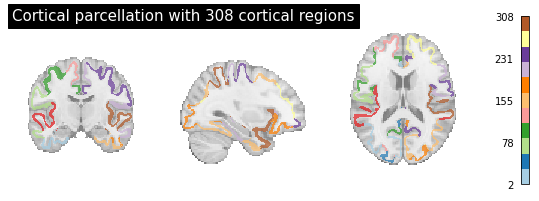

In [16]:
#plot atlas
plotting.plot_roi(f_one, draw_cross = False, annotate = False, colorbar=True, cmap='Paired', title="Cortical parcellation with 308 cortical regions")

There is also a.txt file that contains all the 308 cortical region names. In the following, the .txt file is read.

In [17]:
#read the .txt files with region names

with open('/Users/mello/data/MSc5_research_project/data/atlas/308_regions_names.txt') as f:
    lines = f.readlines()

In [18]:
#region names
lines

['lh_bankssts_part1\n',
 'lh_bankssts_part2\n',
 'lh_caudalanteriorcingulate_part1\n',
 'lh_caudalmiddlefrontal_part1\n',
 'lh_caudalmiddlefrontal_part2\n',
 'lh_caudalmiddlefrontal_part3\n',
 'lh_caudalmiddlefrontal_part4\n',
 'lh_cuneus_part1\n',
 'lh_cuneus_part2\n',
 'lh_entorhinal_part1\n',
 'lh_fusiform_part1\n',
 'lh_fusiform_part2\n',
 'lh_fusiform_part3\n',
 'lh_fusiform_part4\n',
 'lh_fusiform_part5\n',
 'lh_inferiorparietal_part1\n',
 'lh_inferiorparietal_part2\n',
 'lh_inferiorparietal_part3\n',
 'lh_inferiorparietal_part4\n',
 'lh_inferiorparietal_part5\n',
 'lh_inferiorparietal_part6\n',
 'lh_inferiorparietal_part7\n',
 'lh_inferiorparietal_part8\n',
 'lh_inferiortemporal_part1\n',
 'lh_inferiortemporal_part2\n',
 'lh_inferiortemporal_part3\n',
 'lh_inferiortemporal_part4\n',
 'lh_inferiortemporal_part5\n',
 'lh_inferiortemporal_part6\n',
 'lh_isthmuscingulate_part1\n',
 'lh_isthmuscingulate_part2\n',
 'lh_lateraloccipital_part1\n',
 'lh_lateraloccipital_part2\n',
 'lh_la

In [19]:
#proving 308 regions 
len(lines)

308

As we can see above, the 308 cortical region names are displayed in a chronological order from 1 to 308 for both left and right hemisphere. Each of the regions mostly consists of several parts as the names indicate.
Now, having visualized the used atlas with its regions and according labels, we can explore our first modality. 

### 3.1 Macro-structural data: cortical thickness (CT)

For the **macro-structural data**, T1-weighted MPRAGE images were used. The images were aquired with MPRAGE sequences, capturing high tissue contrast and providing high spatial resolution with whole brain coverage in a short scan time [(Wang et al.,2014)](https://doi.org/10.1371/journal.pone.0096899). These were already preprocessed by a prior pipeline [(Withtaker et al., 2016)](https://pubmed.ncbi.nlm.nih.gov/27457931/), using the command from FreeSurfer called "recon-all" [(Dale et al., 1999)](https://pubmed.ncbi.nlm.nih.gov/9931268/). The surface was parcellated according to the above displayed atlas into 308 regions. For each of those regions cortical thickness was estimated.

**Cortical thickness (CT)** is a measurement of the *width of gray matter* of the cerebral cortex, whereas *gray matter* marks the area from the pial surface to the internal surface (where *white matter* begins). It has been shown that **CT** correlates with the diagnosis and prognosis of several psychiatric and neurological conditions [(Tahedl, 2020)](https://translational-medicine.biomedcentral.com/articles/10.1186/s12967-020-02317-9).

In [20]:
#load estimated CT data

CT_Dublin = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_thickness_Dublin.csv', delimiter = ',')

In [21]:
CT_Dublin

,Subject ID,Age,Sex,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,CON9225,21,2,1,2.180,2.382,2.346,2.526,2.747,2.544,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,CON9229,28,2,1,2.394,1.973,2.534,2.439,2.485,2.435,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,CON9231,29,2,1,2.551,2.567,1.954,2.439,2.428,2.190,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,GASP3037,61,1,2,2.187,1.923,2.160,2.410,2.381,2.277,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,GASP3040,47,1,2,1.862,1.750,2.129,2.516,2.244,2.169,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,RPG9019,31,1,2,2.240,2.150,1.995,2.254,2.164,2.008,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,RPG9102,42,2,2,2.269,2.124,2.531,2.502,2.250,2.183,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,RPG9119,41,1,2,2.273,2.559,2.578,2.463,2.463,2.053,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,RPG9121,51,1,2,1.940,2.438,2.272,2.272,2.610,2.099,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


In [22]:
#adjust data frame for visualization

CT_Dublin_ad = CT_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)
CT_Dublin_ad

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,1,2.180,2.382,2.346,2.526,2.747,2.544,2.582,1.816,2.228,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,1,2.394,1.973,2.534,2.439,2.485,2.435,2.458,1.723,1.821,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,1,2.551,2.567,1.954,2.439,2.428,2.190,2.377,2.026,1.800,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,2,2.187,1.923,2.160,2.410,2.381,2.277,2.361,1.585,1.750,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,2,1.862,1.750,2.129,2.516,2.244,2.169,2.220,1.646,1.717,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2,2.240,2.150,1.995,2.254,2.164,2.008,2.298,1.918,1.717,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,2,2.269,2.124,2.531,2.502,2.250,2.183,2.408,1.539,1.611,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,2,2.273,2.559,2.578,2.463,2.463,2.053,2.526,1.733,1.859,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,2,1.940,2.438,2.272,2.272,2.610,2.099,2.538,1.931,1.792,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


In [23]:
#compute mean for patients and control in each brain region

df_mean = CT_Dublin_ad.groupby('Group').mean()

In [24]:
df_mean

,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,lh_entorhinal_part1_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
Group,,,,,,,,,,,,,,,,,,,,,
1,2.401038,2.373775,2.446513,2.578638,2.585075,2.295387,2.621975,1.837425,1.860138,3.277575,...,2.691400,2.599250,2.426575,2.539175,3.707100,2.419613,3.501175,2.693612,3.026488,3.112950
2,2.209143,2.197500,2.332000,2.361286,2.409857,2.116714,2.442500,1.738429,1.775964,3.128000,...,2.454321,2.413071,2.260607,2.255821,3.483464,2.255679,3.302893,2.521464,2.874179,2.923357


In [25]:
#mean of cortical thickness for control and patients

df_mean.mean(axis=1)

Group
1    2.419537
2    2.264815
dtype: float64

As the mean values indicate, the control group has higher mean in **CT** over all brain areas compared to the patients group. Although the difference does not seem too big at first glance, visualization might help to have a better imagination of the data. Before visualizing the difference in mean values for control and patients, it might be helpful to reshape the dataframe as the columns indicate the respective groups and the rows each brain region.

In [26]:
#switch colums and rows

df_trans = df_mean.T

In [27]:
df_trans

Group,1,2
lh_bankssts_part1_thickness,2.401038,2.209143
lh_bankssts_part2_thickness,2.373775,2.197500
lh_caudalanteriorcingulate_part1_thickness,2.446513,2.332000
lh_caudalmiddlefrontal_part1_thickness,2.578638,2.361286
lh_caudalmiddlefrontal_part2_thickness,2.585075,2.409857
...,...,...
rh_transversetemporal_part1_thickness,2.419613,2.255679
rh_insula_part1_thickness,3.501175,3.302893
rh_insula_part2_thickness,2.693612,2.521464
rh_insula_part3_thickness,3.026488,2.874179


In [28]:
#import modules for visualization

import seaborn as sb
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of means of Cortical Thickness for Controls vs. Patients')

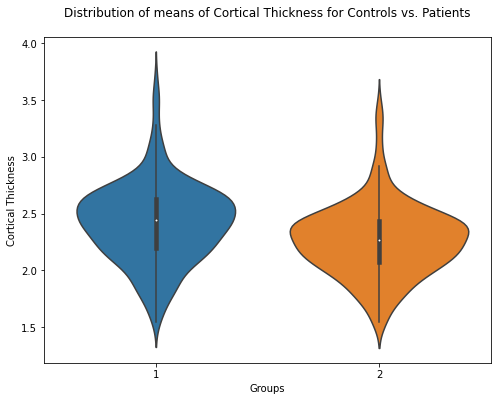

In [29]:
#plot the CT

plt.figure(figsize=(8,6))
ax = sb.violinplot(data=df_trans)
ax.set(xlabel='Groups', ylabel='Cortical Thickness')
plt.title("Distribution of means of Cortical Thickness for Controls vs. Patients", pad = '20')

### 3.1 Micro-structural data: mean diffusivity (MD) and fractional anisotropy (FA)

The **micro-structural** data contains diffusion weighted images (DWI) from which regional cortical measures such as ***mean diffusivity (MD)*** and ***fractional anisotropy (FA)*** were estimated. 

In general, Diffusion MRI measures white matter fibres which makes it feasible to examine connections between different regions. For that, we look at how water diffuses in the brain which again provides information of the brain itself. The diffusion of water can be visualized as cloud if points which again can be approximated with a tensor model. Since there is a distinction in isotropic (characteristics are similar in all directions) vs anisotropic (characteristics e.g. faster in a given direction) diffusion, the tensor model might differ.

**MD** and **FA** are central characteristics of tensors. **MD** indicates how much diffusion there is inside a voxel. **FA** is a measurement of the anisotropy of diffusion with a value range between 0 and 1. While the a **FA** value of 0 stands for isotropic diffusion, the **FA** value of 1 indicates anisotropic diffusion.

In [30]:
#read MD and FA datasets

MD_Dublin= pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_MD_cortexAv_mean_Dublin.csv', delimiter = ',')
FA_Dublin = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_FA_cortexAv_mean_Dublin.csv', delimiter = ',')

In [31]:
MD_Dublin

,Subject ID,Age,Sex,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,CON3140,37,2,1,0.911,0.931,0.891,1.048,0.881,0.939,...,0.928,1.067,1.096,0.892,1.238,1.021,1.166,0.900,0.907,0.937
1,CON3891,33,2,1,0.861,0.913,0.846,0.927,0.888,0.894,...,0.878,0.985,1.045,1.001,1.196,1.083,1.143,0.917,0.923,0.960
2,CON4664,40,2,1,0.817,0.827,0.828,0.828,0.780,0.843,...,0.847,0.849,0.819,0.952,0.933,0.942,1.059,0.794,0.834,0.860
3,CON7009,21,1,1,0.887,0.905,0.878,0.932,0.820,0.888,...,0.957,0.985,0.989,1.075,1.150,1.017,0.986,0.888,0.916,0.928
4,CON7024,59,1,1,0.887,0.854,0.905,1.011,0.946,0.922,...,0.871,0.952,0.987,1.325,0.996,1.094,1.064,0.966,0.989,0.977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,RPG9102,42,2,2,0.843,0.855,0.940,1.017,0.954,0.840,...,0.938,1.062,1.143,0.903,1.364,1.284,1.218,1.017,0.972,1.028
111,RPG9103,37,1,2,0.911,0.914,0.926,1.001,0.918,1.115,...,0.957,1.085,1.098,1.059,1.268,1.089,1.173,0.990,1.065,1.021
112,RPG9119,41,1,2,0.890,0.899,0.886,0.930,0.883,0.882,...,0.916,1.010,0.974,0.968,1.305,1.168,1.265,0.981,0.975,0.972
113,RPG9121,51,1,2,0.920,0.986,0.883,0.879,0.794,0.983,...,0.942,0.985,0.990,1.199,1.353,1.187,1.444,0.947,1.047,1.085


In [32]:
#adjust data frame
MD_Dublin_ad = MD_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)

In [33]:
MD_Dublin_ad

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,1,0.911,0.931,0.891,1.048,0.881,0.939,1.124,0.986,1.045,...,0.928,1.067,1.096,0.892,1.238,1.021,1.166,0.900,0.907,0.937
1,1,0.861,0.913,0.846,0.927,0.888,0.894,0.924,1.040,1.093,...,0.878,0.985,1.045,1.001,1.196,1.083,1.143,0.917,0.923,0.960
2,1,0.817,0.827,0.828,0.828,0.780,0.843,0.825,0.848,0.838,...,0.847,0.849,0.819,0.952,0.933,0.942,1.059,0.794,0.834,0.860
3,1,0.887,0.905,0.878,0.932,0.820,0.888,0.970,0.918,0.900,...,0.957,0.985,0.989,1.075,1.150,1.017,0.986,0.888,0.916,0.928
4,1,0.887,0.854,0.905,1.011,0.946,0.922,1.034,1.126,1.114,...,0.871,0.952,0.987,1.325,0.996,1.094,1.064,0.966,0.989,0.977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2,0.843,0.855,0.940,1.017,0.954,0.840,1.128,1.012,0.997,...,0.938,1.062,1.143,0.903,1.364,1.284,1.218,1.017,0.972,1.028
111,2,0.911,0.914,0.926,1.001,0.918,1.115,1.036,1.026,1.001,...,0.957,1.085,1.098,1.059,1.268,1.089,1.173,0.990,1.065,1.021
112,2,0.890,0.899,0.886,0.930,0.883,0.882,0.883,1.190,1.101,...,0.916,1.010,0.974,0.968,1.305,1.168,1.265,0.981,0.975,0.972
113,2,0.920,0.986,0.883,0.879,0.794,0.983,1.029,1.076,1.053,...,0.942,0.985,0.990,1.199,1.353,1.187,1.444,0.947,1.047,1.085


In [34]:
MD_Dublin_ad.describe()

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,1.286957,0.896339,0.898983,0.882922,0.932548,0.864400,0.901139,0.958783,0.974148,0.973139,...,0.920835,0.977243,0.988322,0.940774,1.124322,1.071852,1.111496,0.927052,0.933983,0.952965
std,0.454321,0.046601,0.054973,0.044997,0.066024,0.052443,0.062069,0.074826,0.080287,0.077571,...,0.044606,0.067147,0.078820,0.129566,0.163160,0.095283,0.113531,0.069964,0.064912,0.065180
min,1.000000,0.812000,0.804000,0.736000,0.797000,0.757000,0.792000,0.795000,0.837000,0.826000,...,0.820000,0.849000,0.819000,0.552000,0.857000,0.921000,0.929000,0.794000,0.812000,0.839000
25%,1.000000,0.867000,0.862500,0.857500,0.887500,0.826000,0.866500,0.903500,0.921000,0.909500,...,0.895500,0.929500,0.933000,0.866000,1.006000,1.005000,1.029000,0.882500,0.892500,0.913000
50%,1.000000,0.890000,0.889000,0.879000,0.926000,0.860000,0.888000,0.949000,0.960000,0.975000,...,0.915000,0.970000,0.983000,0.930000,1.103000,1.057000,1.079000,0.916000,0.921000,0.942000
75%,2.000000,0.918000,0.924000,0.903500,0.965500,0.894500,0.921000,1.005500,1.009500,1.024000,...,0.940000,1.011500,1.045500,1.008500,1.205000,1.126500,1.173500,0.963500,0.957000,0.975000
max,2.000000,1.066000,1.155000,1.033000,1.181000,1.043000,1.141000,1.228000,1.235000,1.168000,...,1.125000,1.223000,1.215000,1.462000,1.728000,1.391000,1.456000,1.201000,1.174000,1.214000


In [58]:
#compute mean for patients and control in each brain region

MD_df_mean = MD_Dublin_ad.groupby('Group').mean()

In [59]:
MD_df_mean

,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,lh_entorhinal_part1_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
Group,,,,,,,,,,,,,,,,,,,,,
1,0.886598,0.890146,0.873439,0.919476,0.858488,0.888854,0.943110,0.953671,0.960768,0.927415,...,0.913402,0.969293,0.976659,0.921305,1.074159,1.046293,1.073183,0.911683,0.914988,0.933293
2,0.920545,0.920939,0.906485,0.965030,0.879091,0.931667,0.997727,1.025030,1.003879,0.985485,...,0.939303,0.997000,1.017303,0.989152,1.248970,1.135364,1.206697,0.965242,0.981182,1.001848


In [60]:
#mean of mean diffusivity for control and patients

MD_df_mean.mean(axis=1)

Group
1    0.937044
2    0.974837
dtype: float64

The values indicate descriptively that the control group has a lower average mean diffusivity compared to patients.

In [61]:
#switch colums and rows

MD_df_trans = MD_df_mean.T

In [62]:
MD_df_trans

Group,1,2
lh_bankssts_part1_thickness,0.886598,0.920545
lh_bankssts_part2_thickness,0.890146,0.920939
lh_caudalanteriorcingulate_part1_thickness,0.873439,0.906485
lh_caudalmiddlefrontal_part1_thickness,0.919476,0.965030
lh_caudalmiddlefrontal_part2_thickness,0.858488,0.879091
...,...,...
rh_transversetemporal_part1_thickness,1.046293,1.135364
rh_insula_part1_thickness,1.073183,1.206697
rh_insula_part2_thickness,0.911683,0.965242
rh_insula_part3_thickness,0.914988,0.981182


Text(0.5, 1.0, 'Distribution of Mean Diffusivity Means for Controls vs. Patients')

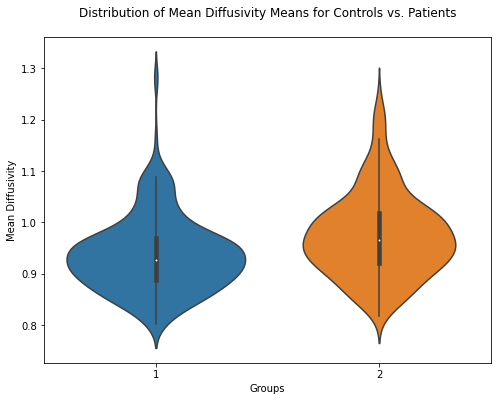

In [64]:
#plot the MD

plt.figure(figsize=(8,6))
ax = sb.violinplot(data=MD_df_trans)
ax.set(xlabel='Groups', ylabel='Mean Diffusivity')
plt.title("Distribution of Mean Diffusivity Means for Controls vs. Patients", pad = '20')

In [35]:
FA_Dublin

,Subject ID,Age,Sex,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,CON3140,37,2,1,0.322,0.147,0.200,0.143,0.189,0.133,...,0.171,0.150,0.127,0.218,0.163,0.158,0.147,0.157,0.147,0.137
1,CON3891,33,2,1,0.302,0.155,0.234,0.139,0.164,0.145,...,0.155,0.139,0.121,0.185,0.173,0.126,0.151,0.152,0.148,0.152
2,CON4664,40,2,1,0.324,0.180,0.226,0.197,0.206,0.142,...,0.176,0.143,0.150,0.173,0.228,0.144,0.150,0.171,0.174,0.143
3,CON7009,21,1,1,0.323,0.139,0.219,0.154,0.200,0.147,...,0.146,0.128,0.147,0.195,0.174,0.134,0.171,0.164,0.159,0.131
4,CON7024,59,1,1,0.295,0.143,0.168,0.139,0.173,0.171,...,0.156,0.140,0.135,0.325,0.168,0.162,0.167,0.144,0.138,0.157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,RPG9102,42,2,2,0.294,0.168,0.238,0.142,0.167,0.162,...,0.144,0.117,0.105,0.199,0.157,0.127,0.136,0.143,0.147,0.134
111,RPG9103,37,1,2,0.293,0.140,0.257,0.151,0.170,0.125,...,0.132,0.106,0.114,0.257,0.164,0.134,0.153,0.157,0.144,0.140
112,RPG9119,41,1,2,0.323,0.173,0.278,0.171,0.188,0.170,...,0.167,0.139,0.143,0.172,0.170,0.157,0.150,0.181,0.143,0.151
113,RPG9121,51,1,2,0.311,0.174,0.226,0.153,0.178,0.127,...,0.145,0.126,0.136,0.158,0.270,0.135,0.140,0.162,0.145,0.123


In [36]:
#adjust data frame

FA_Dublin_ad = FA_Dublin.drop(['Subject ID','Age', 'Sex'], axis=1)

In [37]:
FA_Dublin_ad

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,1,0.322,0.147,0.200,0.143,0.189,0.133,0.124,0.151,0.133,...,0.171,0.150,0.127,0.218,0.163,0.158,0.147,0.157,0.147,0.137
1,1,0.302,0.155,0.234,0.139,0.164,0.145,0.147,0.141,0.144,...,0.155,0.139,0.121,0.185,0.173,0.126,0.151,0.152,0.148,0.152
2,1,0.324,0.180,0.226,0.197,0.206,0.142,0.151,0.157,0.144,...,0.176,0.143,0.150,0.173,0.228,0.144,0.150,0.171,0.174,0.143
3,1,0.323,0.139,0.219,0.154,0.200,0.147,0.145,0.155,0.153,...,0.146,0.128,0.147,0.195,0.174,0.134,0.171,0.164,0.159,0.131
4,1,0.295,0.143,0.168,0.139,0.173,0.171,0.152,0.115,0.145,...,0.156,0.140,0.135,0.325,0.168,0.162,0.167,0.144,0.138,0.157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2,0.294,0.168,0.238,0.142,0.167,0.162,0.120,0.117,0.115,...,0.144,0.117,0.105,0.199,0.157,0.127,0.136,0.143,0.147,0.134
111,2,0.293,0.140,0.257,0.151,0.170,0.125,0.146,0.125,0.139,...,0.132,0.106,0.114,0.257,0.164,0.134,0.153,0.157,0.144,0.140
112,2,0.323,0.173,0.278,0.171,0.188,0.170,0.167,0.104,0.156,...,0.167,0.139,0.143,0.172,0.170,0.157,0.150,0.181,0.143,0.151
113,2,0.311,0.174,0.226,0.153,0.178,0.127,0.133,0.100,0.119,...,0.145,0.126,0.136,0.158,0.270,0.135,0.140,0.162,0.145,0.123


In [38]:
FA_Dublin_ad.describe()

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,1.286957,0.314870,0.157548,0.219122,0.157113,0.175617,0.147278,0.144287,0.132426,0.146165,...,0.150209,0.136339,0.135704,0.225574,0.193504,0.137374,0.154452,0.156061,0.150061,0.143174
std,0.454321,0.017583,0.013954,0.026340,0.020100,0.020631,0.014497,0.016244,0.016366,0.016939,...,0.013803,0.013994,0.015891,0.074857,0.032147,0.016594,0.015699,0.015335,0.013595,0.012983
min,1.000000,0.243000,0.122000,0.141000,0.117000,0.134000,0.111000,0.107000,0.095000,0.108000,...,0.114000,0.106000,0.103000,0.115000,0.141000,0.107000,0.128000,0.126000,0.120000,0.113000
25%,1.000000,0.303000,0.147000,0.201500,0.145500,0.163500,0.137500,0.135000,0.122000,0.134000,...,0.141500,0.126000,0.124000,0.186000,0.172000,0.125500,0.143000,0.144000,0.142000,0.134500
50%,1.000000,0.316000,0.158000,0.221000,0.154000,0.173000,0.148000,0.143000,0.130000,0.146000,...,0.151000,0.136000,0.134000,0.211000,0.184000,0.136000,0.153000,0.156000,0.148000,0.143000
75%,2.000000,0.326000,0.167000,0.235000,0.167000,0.184500,0.156500,0.151500,0.144500,0.158500,...,0.159000,0.145500,0.147000,0.241500,0.208000,0.148000,0.165500,0.164000,0.159000,0.151000
max,2.000000,0.355000,0.195000,0.312000,0.245000,0.247000,0.182000,0.230000,0.174000,0.188000,...,0.181000,0.181000,0.177000,0.593000,0.328000,0.192000,0.204000,0.210000,0.188000,0.179000


In [65]:
#compute mean for patients and control in each brain region

FA_df_mean = FA_Dublin_ad.groupby('Group').mean()

In [66]:
FA_df_mean

,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,lh_entorhinal_part1_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
Group,,,,,,,,,,,,,,,,,,,,,
1,0.318866,0.157451,0.218463,0.157512,0.174805,0.147061,0.144451,0.135451,0.148573,0.213183,...,0.151720,0.137244,0.136427,0.223732,0.193293,0.135671,0.156598,0.155098,0.151024,0.143634
2,0.304939,0.157788,0.220758,0.156121,0.177636,0.147818,0.143879,0.124909,0.140182,0.212152,...,0.146455,0.134091,0.133909,0.230152,0.194030,0.141606,0.149121,0.158455,0.147667,0.142030


In [68]:
#mean of fractional anisotropy for control and patients

FA_df_mean.mean(axis=1)

Group
1    0.166799
2    0.164951
dtype: float64

The values seem to indicate an isotropic diffusion in both control and patient groups.

In [69]:
#switch colums and rows

FA_df_trans = FA_df_mean.T

In [70]:
FA_df_trans

Group,1,2
lh_bankssts_part1_thickness,0.318866,0.304939
lh_bankssts_part2_thickness,0.157451,0.157788
lh_caudalanteriorcingulate_part1_thickness,0.218463,0.220758
lh_caudalmiddlefrontal_part1_thickness,0.157512,0.156121
lh_caudalmiddlefrontal_part2_thickness,0.174805,0.177636
...,...,...
rh_transversetemporal_part1_thickness,0.135671,0.141606
rh_insula_part1_thickness,0.156598,0.149121
rh_insula_part2_thickness,0.155098,0.158455
rh_insula_part3_thickness,0.151024,0.147667


Text(0.5, 1.0, 'Distribution of Fractional Anisotropy Means for Controls vs. Patients')

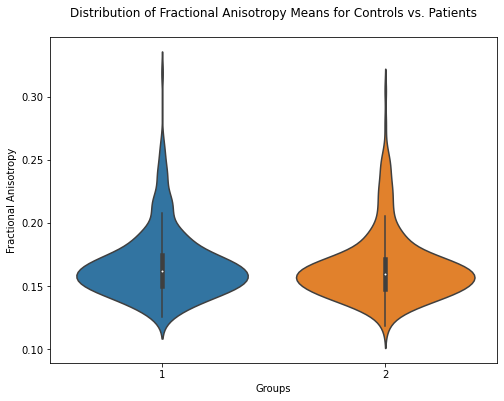

In [71]:
#plot the FA

plt.figure(figsize=(8,6))
ax = sb.violinplot(data=FA_df_trans)
ax.set(xlabel='Groups', ylabel='Fractional Anisotropy')
plt.title("Distribution of Fractional Anisotropy Means for Controls vs. Patients", pad = '20')

## 3.1 DTI Networks

First of all, I am going to explore the DTI network data, followed by the regional MD and FA values and lastly the CT data.

The data that contains the DTI networks are available as matlab files. In the following, it is depicted how the matlab files can be downloaded and read.

####  3.1.1 Download the .mat files

If you click on the name of the matlab datafile on figshare , it then only shows you the preview of the matlab file and the link of that is for the respective preview. If you want to copy the link of the matlab file itself, you have to right-click on the datafile name and then copy the link.

In [39]:
import urllib.request

In [40]:
print('Beginning file download with urllib2...')

url = "https://figshare.com/ndownloader/files/22782440"
urllib.request.urlretrieve(url, '/Users/mello/data/Msc5_research_project/data/DTI_Dublin.mat')

Beginning file download with urllib2...


('/Users/mello/data/Msc5_research_project/data/DTI_Dublin.mat',
 <http.client.HTTPMessage at 0x7f9c725fa908>)

In [41]:
print('Beginning file download with urllib2...')

url = "https://figshare.com/articles/dataset/Data_for_Functional_MRI_connectivity_accurately_distinguishes_cases_with_psychotic_disorders_from_healthy_controls_based_on_cortical_features_associated_with_brain_network_development_/12361550?file=22782443" 
urllib.request.urlretrieve(url, '/Users/mello/data/Msc5_research_project/data/DTI_Maastricht.mat')

Beginning file download with urllib2...


('/Users/mello/data/Msc5_research_project/data/DTI_Maastricht.mat',
 <http.client.HTTPMessage at 0x7f9c725fae80>)

#### 3.1.2 Read the .mat files

In [42]:
import scipy.io

**Dublin**

In [43]:
DTI_Dublin = scipy.io.loadmat('/Users/mello/data/Msc5_research_project/data/DTI_Dublin.mat')

In [44]:
DTI_Dublin.keys()

dict_keys(['__header__', '__version__', '__globals__', 'nostreamlines_new'])

In [45]:
DTI_Dublin['nostreamlines_new'].shape

(1, 123)

123 Probanden mit DTI Matrizen.
Wie sehen DTI Matrizen aus?

In [46]:
DTI_Dublin['nostreamlines_new'][0].shape

(123,)

In [47]:
DTI_Dublin['nostreamlines_new'][0][0].shape

(308, 308)

Zwischen 308 Regionen basierend auf DTI Daten Werte (siehe course website, nochmal durchlesen!!)

<AxesSubplot:>

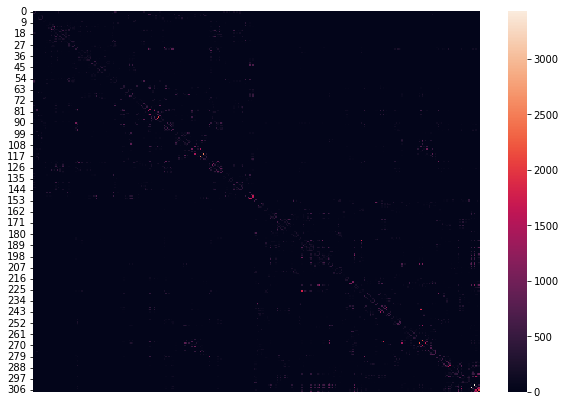

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(DTI_Dublin['nostreamlines_new'][0][0], xticklabels=False, cmap='rocket')

**Maastricht**

In [49]:
DTI_Maastricht = scipy.io.loadmat('/Users/mello/Desktop/Dataset//DTI_Maastricht.mat')

In [50]:
DTI_Maastricht.keys()

dict_keys(['__header__', '__version__', '__globals__', 'nostreamlines_new'])